João Pedro Turri
nUSP 6805993

In [38]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
from skimage import io, exposure
import pandas as pd
import numpy as np

In [40]:
drive.mount('/content/gdrive')
# Os arquivos foram mantidos na pasta "EP1" para não alterar
# os links de acesso já gerados. 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
cd gdrive/MyDrive/EP1

[Errno 2] No such file or directory: 'gdrive/MyDrive/EP1'
/content/gdrive/Shareddrives/Visão/EP1


In [41]:
# carregar o dataset original 
df = pd.read_csv('metadados.csv')

In [42]:
# 2.2.1
# GERA NORMALIZED DATASET,
# IDENTIFICADO PELO PREFIXO norm_

# Método auxiliar para simplificar
def normaliza(img):
  return exposure.equalize_hist(img)

#Prefixos que identificam os métodos de augmentação
aug_method = ["gray_","log_","gamma_","gradient_","mean_"]

for index, row in df.iterrows():
  fn = row["FILENAME"] #filename
  for m in aug_method:
    i = "dataset_augmented/" + m + fn
    o = "dataset_augmented/norm_" + m + fn
    io.imsave(o,(normaliza(io.imread(i))*255).astype(np.uint8))

Protótipos médios do ORIGINAL GRAY DATASET



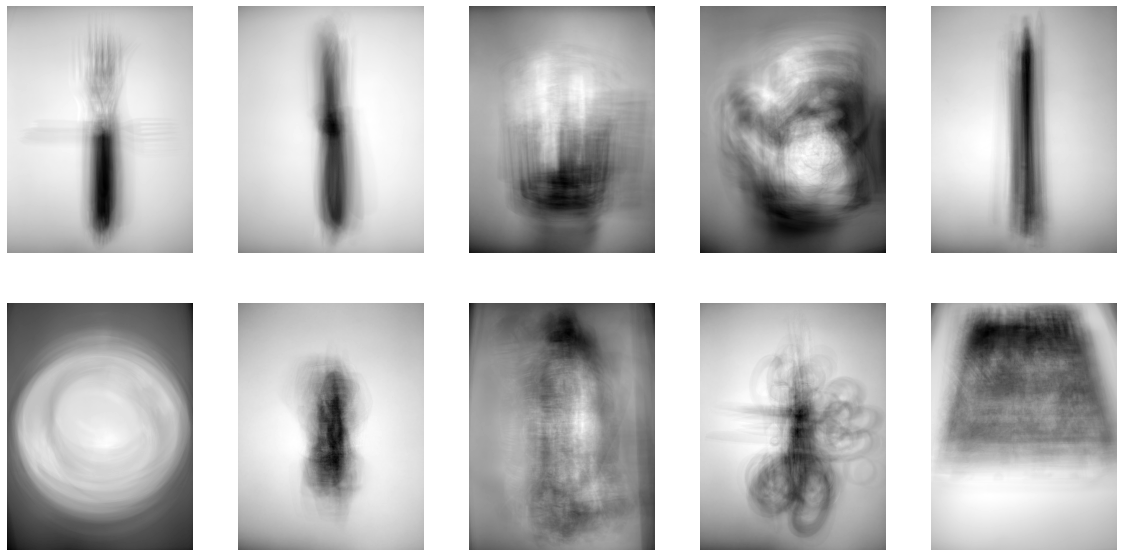


Protótipos médios do AUGMENTED DATASET



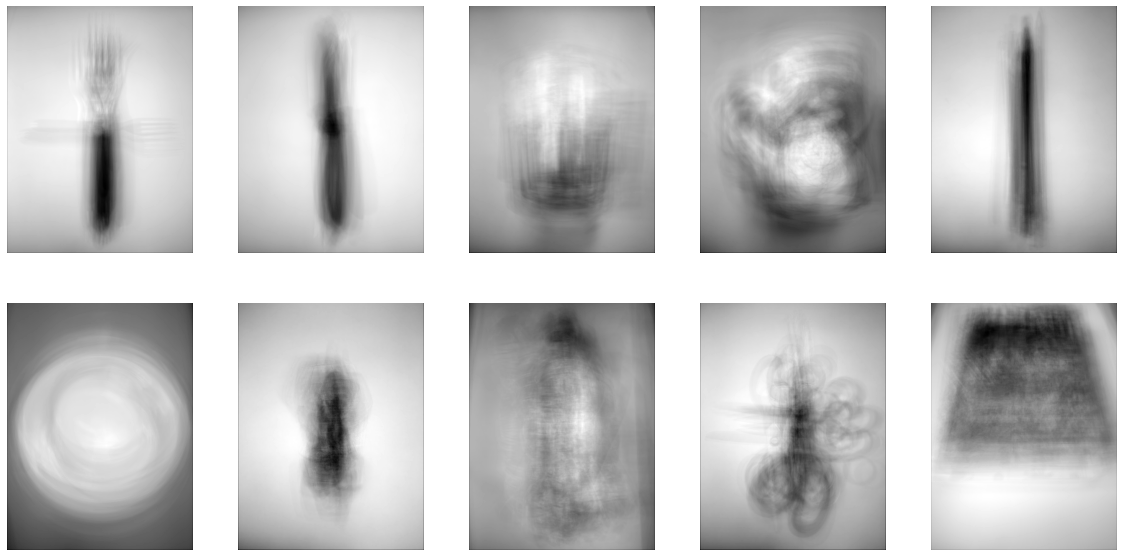


Protótipos médios do NORMALIZED DATASET



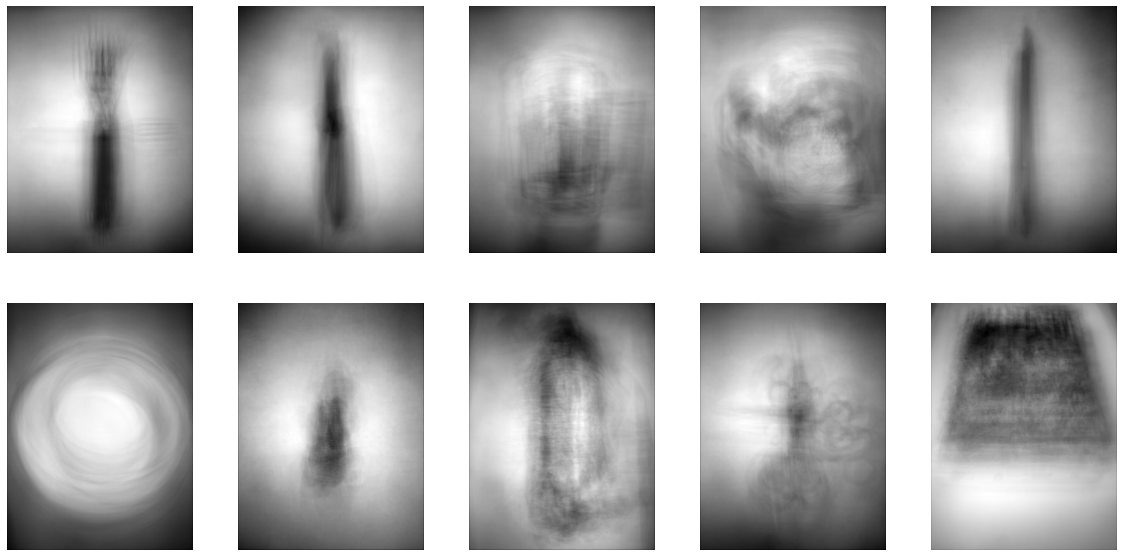

In [43]:
# 2.2.2

# Dicionário para facilitar impressão de informações
augs = {"gray_":"RGB2Gray",\
        "gradient_":"Soma de fundo com gradiente de níveis de cinza",\
        "log_":"Logaritmo da imagem",\
        "gamma_":"Exponencial da imagem",\
        "mean_":"Filtro da média implementado usando convolução"}

"""
Função auxiliar para calcular o protótipo médio
de um subconjunto de um dataframe
"""
def prototipo_medio(subdf,augtype):

  soma = np.zeros([400,300], dtype='float64')

  for index, row in subdf.iterrows():
    for t in augtype:
      fn = "dataset_augmented/"+ t + row["FILENAME"]
      i = io.imread(fn)
      soma += i 

  soma /= ( len(subdf) * len(augtype) )
  return soma

def show_prototypes(l):
  n_colunas, n_linhas = 5, 2 #Exibir 5 imagens por fileira 
  fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(20, 10))
  num_fotos = n_colunas * n_linhas
  for e, ob in enumerate(l[:num_fotos]):
      l, c = (e // n_colunas, e % n_colunas)
      axs[l, c].imshow(ob,cmap="gray")
      axs[l, c].axis('off')
  plt.show()

# PROTÓTIPO MÉDIO - ORIGINAL GRAY DATASET
pm_ogd = []
print("Protótipos médios do ORIGINAL GRAY DATASET\n")
for c in df.CLASSE.unique():
  p1 = prototipo_medio(df[(df['CLASSE']==c)],["gray_"])
  pm_ogd.append(p1)
show_prototypes(pm_ogd)

# PROTÓTIPO MÉDIO - AUGMENTED DATASET
pm_ad = []
print("\nProtótipos médios do AUGMENTED DATASET\n")
for c in df.CLASSE.unique():
  p2 = prototipo_medio(df[(df['CLASSE']==c)],["gray_","log_","gamma_","gradient_","mean_"])
  pm_ad.append(p2)
show_prototypes(pm_ad)

# PROTÓTIPO MÉDIO - NORMALIZED DATASET
pm_nd = []
print("\nProtótipos médios do NORMALIZED DATASET\n")
for c in df.CLASSE.unique():
  p3 = prototipo_medio(df[(df['CLASSE']==c)],["norm_gray_","norm_log_","norm_gamma_","norm_gradient_","norm_mean_"])
  pm_nd.append(p3)
show_prototypes(pm_nd)

